# Overview

This week's curriculum focuses in figuring out (and visualizing) what's special about a certain text (or collection of texts). We'll also learn about community detection in networks (that's how we'll get our groups of text)

* Tricks for raw text (NLPP, Chapter 3).
* Community Detection and info-boxes 
* Identifying important words in a document (TF-IDF)

In the first part, we will take a quick tour of NLPP1e's chapter 3, which is boring, but an amazing ressource that you'll keep returning to. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. 

In the latter parts we will go back to network science, discussing community detection, mixing in some NLP, and trying it all out on our very own dataset.


# Part 1: Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. 

In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

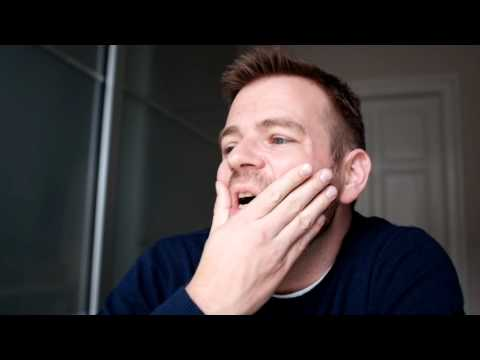

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

In [6]:
from __future__ import division  # Python 2 users only
import nltk, re, pprint
from nltk import word_tokenize 

url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/refs/heads/main/files/artists_genres_dictionary.txt"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'{"A Thousand Horses": ["country", "country rock", "southern '

In [7]:
from urllib import request

url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/refs/heads/main/files/artists_genres_dictionary.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
raw[:60]

'{"A Thousand Horses": ["country", "country rock", "southern '

In [10]:
from bs4 import BeautifulSoup

raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
tokens[:50]

['{',
 '``',
 'A',
 'Thousand',
 'Horses',
 "''",
 ':',
 '[',
 '``',
 'country',
 "''",
 ',',
 '``',
 'country',
 'rock',
 "''",
 ',',
 '``',
 'southern',
 'rock',
 "''",
 ']',
 ',',
 '``',
 'A.P',
 '.',
 'Carter',
 "''",
 ':',
 '[',
 '``',
 'country',
 "''",
 ',',
 '``',
 'folk',
 "''",
 ',',
 '``',
 'gospel',
 "''",
 ']',
 ',',
 '``',
 'Aaron',
 'Barker',
 "''",
 ':',
 '[',
 '``']

# Part 2: Community detection

Before we get started on *network* communities, we'll grab some information on a different kind of communities based on information from Wikipedia. Specifically, the ``infoboxes``. An infobox is the little box usually displayed on the right when you open an artist's page. 

For example if you open the page for [Old 97's](https://en.wikipedia.org/wiki/Old_97%27s), you'll see that it contains info about their ***origin***, the ***genre***s of music they've been associated with, their ***year's active***, the record ***labels*** they've signed with, etc. All really interesting information if we want to understand the network of artists.

Today, we'll be playing with **genre**. It's not easy to extract information from the infoboxes, but one of your amazing TAs (Aliaksandr) has done the job for you already (he even parsed the html to get data for more artists).

> **You can download the genres [here](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/refs/heads/main/files/artists_genres_dictionary.txt)**.



Now, let's watch a lecture to learn about communities. If you want all the details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the video lecture below should be enough to get you started. 

**Note**: For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: Communities in networks. 

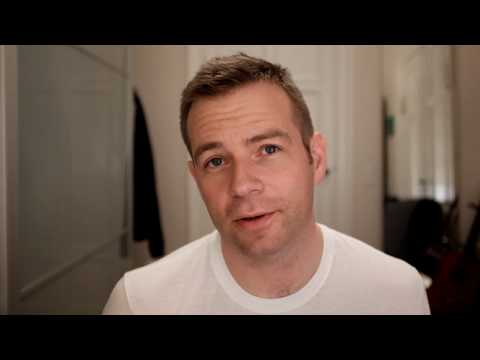

In [2]:
YouTubeVideo("FSRoqXw28RI",width=800, height=450)

*Exercise*: Use the concept of modularity to explore how _community-like_ the genres are.
> 
> * Explain the concept of modularity in your own words.
> * Work from the undirected version of the network, keeping only the nodes for which you have genre information in the file above. 
> * Now create your own partition of the network into genres.
>      * **Each node is simply characterized by the *first genre* in its list of genres**.
>      * Each community is the group of nodes that share the same genre.
>      * That's all you need, now calculate the modularity of this division of the network into genres.
>      * **Note**: Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity _M_ of the partition described above. Are the genres good communities?
> * Spoiling your findings a little bit, an issue is the following: Almost all artists have the genre `country` as their first genre in the list, so by definition the network won't have very high modularity. What happens to the modularity if you grab the first genre *that's not `country`* as the genre-assignment for all nodes that have more than one genre? 

<div class="alert alert-block alert-info">
Overall, it's OK to use an LLM to help with the code here. But do write your own explanation of modularity, and do try to implement a modularity on your own from eq 9.12 in the book.
</div>

Modularity is a way to assess how effectively a network can be divided into clusters, known as communities. The main concept of modularity is to evaluate how well a network can be organized into groups where the nodes in the same group are more closely linked to each other than to nodes in different groups.

It is calculated by looking at the density of connections within communities and comparing it to what we would expect if the connections were made randomly. If the nodes in a community have more links to each other than we would anticipate by chance, the modularity score will be high, indicating a strong community structure. On the other hand, if the connections appear more random and are spread out across the network, the modularity score will be low, suggesting a weaker community structure.

##### Creating the country network

In [107]:
import re
import requests
import os
import networkx as nx
import matplotlib.pyplot as plt
import json

import community  # This is python-louvain
import random
import matplotlib.cm as cm
from fa2_modified import ForceAtlas2

import nltk
import string
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


import numpy as np
import pandas as pd

from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Read in the text file (assuming it's cleaned up and saved locally)
with open('wiki.txt', 'r', encoding='utf-8') as file:
    content = file.read()

# Regular expression to match all links
links = re.findall(r'\[\[(.*?)\]\]', content)

# Clean up and process links (handle pipes for display text)
artists = []
for link in links:
    # If there's a pipe, the first part is the link, the second part is the display text
    if '|' in link:
        artists.append(link.split('|')[0])
    else:
        artists.append(link)

print(f'Total number of artists: {len(artists)}')

Total number of artists: 2100


In [ ]:
# Base URL for Wikipedia API
BASE_API_URL = "https://en.wikipedia.org/w/api.php"

# Directory to save text files
SAVE_DIR = "country_artists_wiki"

# Ensure the directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

def fetch_wikitext(page_title):
    """Fetch the wikitext of a Wikipedia page."""
    params = {
        "action": "query",
        "format": "json",
        "titles": page_title,
        "prop": "revisions",
        "rvprop": "content",
        "formatversion": "2",
    }
    response = requests.get(BASE_API_URL, params=params)
    data = response.json()
    pages = data.get("query", {}).get("pages", [])
    
    if pages and "revisions" in pages[0]:
        return pages[0]["revisions"][0]["content"]
    return None

def save_wikitext(artist, wikitext):
    """Save the wikitext to a file."""
    # Replace spaces and invalid characters with underscores for file names
    safe_artist = re.sub(r'[\\/*?:"<>|]', "_", artist)
    filename = os.path.join(SAVE_DIR, f"{safe_artist.replace(' ', '_')}.txt")
    with open(filename, "w", encoding="utf-8") as file:
        file.write(wikitext)

# Iterate through the list of artists and download their Wikipedia page wikitext
for artist in artists:
    wikitext = fetch_wikitext(artist)
    
    if wikitext:
        save_wikitext(artist, wikitext)
    else:
        print(f"Wikitext for {artist} not found or page is missing.")

print("Done fetching all wikitexts.")

Done fetching all wikitexts.


In [ ]:
# Directory containing Wikipedia pages
SAVE_DIR = "country_artists_wiki"

# Sample list of performers (This should be replaced with the complete list)
performers = [file.replace('_', ' ').replace('.txt', '') for file in os.listdir(SAVE_DIR) if file.endswith('.txt')]

# Initialize the directed graph
G = nx.DiGraph()

# Helper function to count words in the page content
def count_words(content):
    words = re.findall(r'\b\w+\b', content)
    return len(words)

# Function to extract valid links pointing to other performers
def extract_links(wikitext, performers):
    # Regular expression to find all Wikipedia links
    links = re.findall(r'\[\[(.*?)(?:\|(.*?))?\]\]', wikitext)
    valid_links = []
    
    for link, display_text in links:
        # Clean the link, replace underscores with spaces, and match against performers
        clean_link = link.replace('_', ' ').strip()
        if clean_link in performers:
            valid_links.append(clean_link)
    
    return valid_links

# Process all performer pages in the directory
for performer_file in os.listdir(SAVE_DIR):
    if performer_file.endswith('.txt'):
        performer_name = performer_file.replace('_', ' ').replace('.txt', '')
        
        # Open and read the wikitext for this performer
        with open(os.path.join(SAVE_DIR, performer_file), 'r', encoding='utf-8') as f:
            wikitext = f.read()
        
        # Extract links to other performers
        linked_performers = extract_links(wikitext, performers)
        
        # Count the number of words in the page content
        word_count = count_words(wikitext)
        
        # Add the node to the graph with the word count as an attribute
        G.add_node(performer_name, word_count=word_count)
        
        # Add directed edges from this performer to the performers they link to
        for linked_performer in linked_performers:
            G.add_edge(performer_name, linked_performer)

# Output the total number of nodes and edges
print(f"Total performers (nodes): {G.number_of_nodes()}")
print(f"Total links (edges): {G.number_of_edges()}")

# Save the graph to a file
nx.write_graphml(G, "country_artists_graph.graphml")

Total performers (nodes): 2098
Total links (edges): 17708


In [23]:
# Read the graph from the file
G = nx.read_graphml("country_artists_graph.graphml")

# Remove disconnected nodes from the graph
G.remove_nodes_from(list(nx.isolates(G)))

# Remove self-loops from the graph
G.remove_edges_from(nx.selfloop_edges(G))

# Remove multiple edges between the same nodes
G = nx.DiGraph(G)

# Output the updated number of nodes and edges
print(f"Total performers (nodes): {G.number_of_nodes()}")
print(f"Total links (edges): {G.number_of_edges()}")

Total performers (nodes): 1952
Total links (edges): 17705


##### Calculating Modularity by Genre

In [ ]:
# Convert the graph to an undirected graph
G_undirect = G.to_undirected()

# Load genre data from URL
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/refs/heads/main/files/artists_genres_dictionary.txt"
response = requests.get(url)
genre_data = json.loads(response.text)

# List of artist names with genre data
artist_nodes = set(genre_data.keys())

# Filter the network to include only artists with genre data
filtered_G = G_undirect.subgraph(artist_nodes).copy()

print(f"Number of nodes in the filtered graph: {filtered_G.number_of_nodes()}")
print(f"Number of edges in the filtered graph: {filtered_G.number_of_edges()}")

Number of nodes in the filtered graph: 1828
Number of edges in the filtered graph: 14087


In [27]:
# Create a partition based on the first genre
partition = {}
for node in filtered_G.nodes():
    first_genre = genre_data[node][0]  # Get the first genre of the artist
    if first_genre not in partition:
        partition[first_genre] = set() # Initialize the genre set
    partition[first_genre].add(node) # Add the artist to the genre set

# Display the partition structure (for verification)
for genre, nodes in partition.items():
    print(f"{genre}: {len(nodes)} nodes")

country: 1218 nodes
folk: 36 nodes
country rock: 34 nodes
neotraditional country: 12 nodes
alternative metal: 1 nodes
soul: 4 nodes
rock: 44 nodes
tropical rock: 1 nodes
blues: 6 nodes
western swing: 7 nodes
outlaw country: 6 nodes
alternative country: 24 nodes
progressive country: 7 nodes
rock and roll: 14 nodes
pop: 44 nodes
country music: 25 nodes
bluegrass: 51 nodes
old-time: 2 nodes
southern rock: 11 nodes
country pop: 30 nodes
australian country: 1 nodes
jazz: 5 nodes
americana: 50 nodes
country-folk: 1 nodes
soft rock: 3 nodes
progressive bluegrass: 8 nodes
ccm: 3 nodes
texas country: 5 nodes
tejano: 3 nodes
vocal pop: 1 nodes
traditional pop: 5 nodes
rockabilly: 12 nodes
new mexico music: 2 nodes
latin pop: 1 nodes
latin music: 1 nodes
contemporary christian: 3 nodes
folk rock: 5 nodes
roots rock: 5 nodes
alt country: 1 nodes
country folk: 5 nodes
indie pop: 2 nodes
swamp rock: 1 nodes
hard rock: 4 nodes
blue-eyed soul: 2 nodes
neotraditionalist country: 1 nodes
garage rock: 1 

In [28]:
# Calculate L (total links) in the entire network
L = filtered_G.number_of_edges()

# Calculate modularity using the formula from chapter 9
modularity_value_genre = 0
for community in partition.values():
    subgraph = filtered_G.subgraph(community)
    
    # L_c: Count of edges within the community
    L_c = subgraph.number_of_edges()
    
    # k_c: Total degree of the nodes in this community
    k_c = sum(deg for node, deg in subgraph.degree())

    # Calculate modularity contribution for this community 
    # (L_C/L is the fraction of edges within the community, and k_c/(2L) is the expected fraction of edges in a random network)
    modularity_value_genre += ((L_c / L) - (k_c / (2 * L)) ** 2)

print("Modularity of the genre-based partition (formula book):", modularity_value_genre)


Modularity of the genre-based partition (formula book): 0.27723470343349854


The modularity score is low, meaning there is that degree of community structure, but it is not particularly strong.

This might be due to the fact that there are 1,218 nodes categorized as "country," making this genre the largest community by far. As a result, a lot of the edges are likely found within this one group. When communities are large, they can lower the modularity score because the $\left(\frac{k_c}{2L}\right)^2$ value gets really high, which means this cluster's impact on modularity is lessened.

Additionally, several genres that have only one or just a few nodes. These small or single-node communities barely affect the modularity score since they lack internal edges to add to the $L_c$ value. Therefore, their contribution to modularity is minimal, which ultimately decreases the overall modularity of the network.

In [29]:
# Partition nodes based on the first genre that is not "country"
partition = {}
for node in filtered_G.nodes():
    genres = genre_data[node]
    
    # Find the first genre that is not "country" or default to "country" if none found
    first_non_country_genre = next((genre for genre in genres if genre != "country"), "country")
    
    # Create a community for the genre if it doesn't exist and add the node
    if first_non_country_genre not in partition:
        partition[first_non_country_genre] = set()
    partition[first_non_country_genre].add(node)

# Display the partition structure (for verification)
for genre, nodes in partition.items():
    print(f"{genre}: {len(nodes)} nodes")


outlaw country: 23 nodes
ccm: 6 nodes
gospel: 21 nodes
country: 762 nodes
folk: 74 nodes
country rock: 72 nodes
americana: 65 nodes
country pop: 84 nodes
honky-tonk: 9 nodes
neotraditional country: 18 nodes
christian music: 3 nodes
alternative metal: 1 nodes
soul: 6 nodes
rock: 58 nodes
nashville sound: 11 nodes
tropical rock: 1 nodes
blues: 17 nodes
soft rock: 7 nodes
western: 13 nodes
red dirt: 8 nodes
western swing: 13 nodes
alternative country: 30 nodes
progressive country: 14 nodes
rock and roll: 17 nodes
pop: 89 nodes
country music: 25 nodes
and: 2 nodes
bluegrass: 77 nodes
old-time: 3 nodes
southern rock: 20 nodes
easy listening: 1 nodes
rockabilly: 32 nodes
australian country: 1 nodes
jazz: 7 nodes
country-folk: 1 nodes
country folk: 7 nodes
progressive bluegrass: 8 nodes
texas country: 6 nodes
tejano: 3 nodes
southern gospel: 2 nodes
vocal pop: 1 nodes
traditional pop: 6 nodes
new mexico music: 2 nodes
latin pop: 1 nodes
latin music: 1 nodes
christian: 6 nodes
contemporary chr

In [30]:
# Calculate modularity using Equation 9.12 with this new partition
L = filtered_G.number_of_edges()
modularity_value_nocountry = 0
for community in partition.values():
    subgraph = filtered_G.subgraph(community)
    
    # L_c: Count of edges within the community
    L_c = subgraph.number_of_edges()
    
    # k_c: Sum of degrees of nodes in the community
    k_c = sum(deg for node, deg in subgraph.degree())
    
    # Calculate modularity contribution for this community
    modularity_value_nocountry += ((L_c / L) - (k_c / (2 * L)) ** 2)

print("Modularity of the non-country genre-based partition (formula book):", modularity_value_nocountry)

Modularity of the non-country genre-based partition (formula book): 0.17472737551903214


Initially, a significant number of nodes were grouped in the "country" category, forming a big community more or less interconnected. However, by moving many of these nodes to smaller, specific genres, the network now has a greater number of communities, but each one is less connected internally.

Breaking the network down by specific genres has also probably increased the number of connections between different communities, since many genres have overlapping influences (like "country rock" and "rock"). These connections between communities further lower the modularity score because modularity is highest when connections are kept within the same community.

Additionally, many of the new communities are quite small, with just one node each, which also contributes to the drop in the modularity score.

*Exercise*: Community detection finding structral communities in the network
> * Again, work only with the subnetwork of nodes that have a genre according to Aliaksandr's list (that you downloaded above). 
> * Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities each network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the genres as communities? What does this comparison reveal about them?
>     * **Note**: This implementation is also available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain). 
>     * **Note**: You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.
> * What is the modularity of this partitioning of the network? Is it more community-like than the genres?
> * Visualize the network, using the Force Atlas algorithm (see Lecture 5, exercise 2).
>     * This time assign each node a different color based on its structural _community_.
>     * **Note**: If there's a lot of small communities, it's OK to only color the 5-10 largest communities (you can make the remaing nodes light gray or some netural color)
>     * Describe the structure you observe.

<div class="alert alert-block alert-info">
It's OK to use an LLM to help with the code here. 
</div>

In [52]:
# Apply the Louvain method to find communities
partition = community.best_partition(filtered_G)

# Group nodes by their community IDs
community_groups = {}
for node, comm_id in partition.items():
    if comm_id not in community_groups:
        community_groups[comm_id] = set()
    community_groups[comm_id].add(node)

# Display the partition structure (for verification)
for comm_id, nodes in community_groups.items():
    print(f"Community {comm_id}: {len(nodes)} nodes")

Community 0: 242 nodes
Community 1: 359 nodes
Community 2: 399 nodes
Community 3: 150 nodes
Community 4: 304 nodes
Community 5: 317 nodes
Community 6: 5 nodes
Community 7: 50 nodes
Community 9: 1 nodes
Community 8: 1 nodes


In [53]:
# Calculate modularity using Equation 9.12 with the grouped communities
L = filtered_G.number_of_edges()
modularity_value_louvain = 0
for nodes in community_groups.values():
    subgraph = filtered_G.subgraph(nodes)
    
    # L_c: Count of edges within the community
    L_c = subgraph.number_of_edges()
    
    # k_c: Sum of degrees of nodes in the community
    k_c = sum(deg for node, deg in subgraph.degree())
    
    # Calculate modularity contribution for this community
    modularity_value_louvain += ((L_c / L) - (k_c / (2 * L)) ** 2)

print("Modularity of the Louvain-based partition (formula book):", modularity_value_louvain)

Modularity of the Louvain-based partition (formula book): 0.5045382347462215


Louvain modularity (0.523) is higher than the genre-based modularity (0.277).
It is higher because it detects communities based on actual connections, rather than genre labels, creating communities with denser internal connectivity and fewer inter-community edges. 

100%|██████████| 1000/1000 [00:35<00:00, 27.96it/s]
C:\Users\Alba\AppData\Local\Temp\ipykernel_20056\456179372.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(largest_communities) + 1)


BarnesHut Approximation  took  2.72  seconds
Repulsion forces  took  31.89  seconds
Gravitational forces  took  0.10  seconds
Attraction forces  took  0.13  seconds
AdjustSpeedAndApplyForces step  took  0.42  seconds


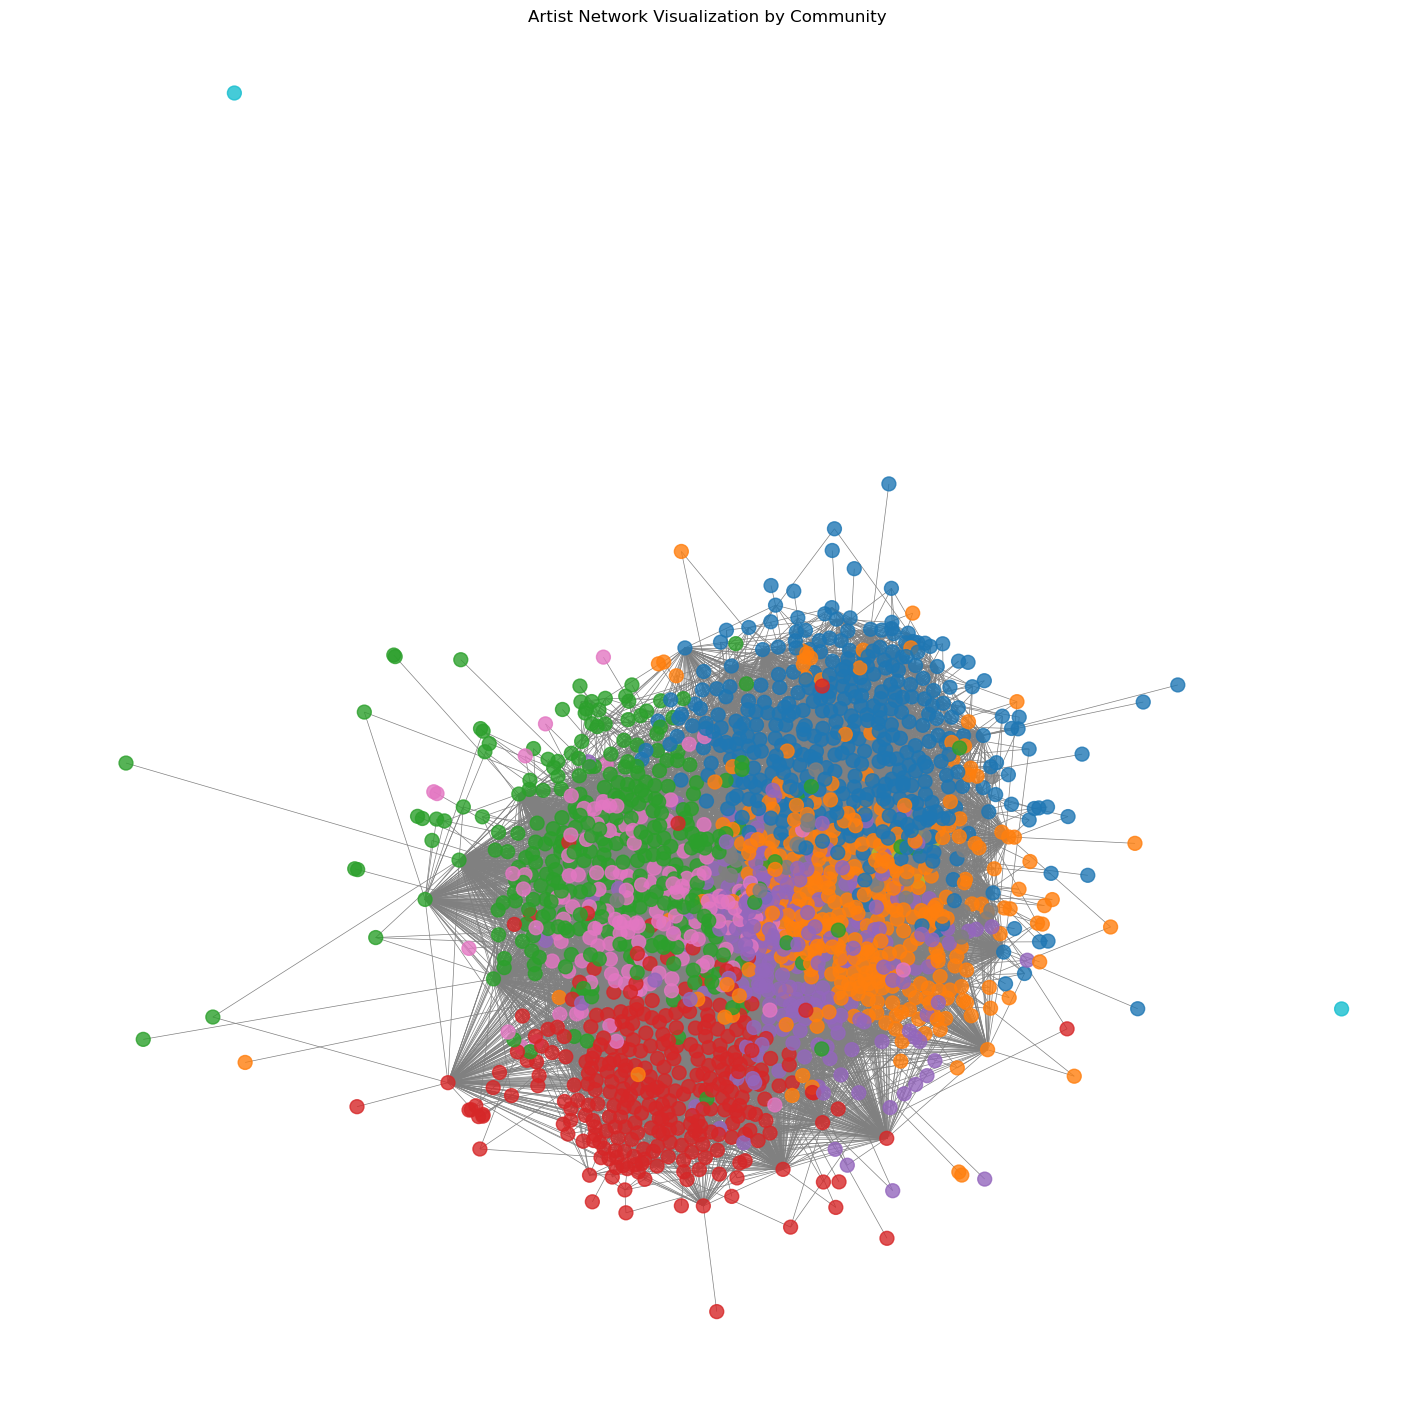

In [60]:
# Select the 5-10 largest communities
largest_communities = sorted(community_groups.items(), key=lambda x: len(x[1]), reverse=True)[:10]
community_colors = {comm_id: idx for idx, (comm_id, _) in enumerate(largest_communities)}

# Assign colors based on community membership
node_colors = []
for node in filtered_G.nodes():
    comm_id = partition[node]  # Get community ID for the node
    if comm_id in community_colors:
        node_colors.append(community_colors[comm_id])
    else:
        node_colors.append(-1)  # Assign a neutral color for smaller communities

# Use ForceAtlas2 to get the positions
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=True,
    linLogMode=False,
    adjustSizes=False,
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,
    scalingRatio=20.0,
    strongGravityMode=False,
    gravity=200,
    verbose=True
)

# Get the positions using ForceAtlas2
positions = forceatlas2.forceatlas2_networkx_layout(filtered_G, iterations=1000)

# Define the color map
# Using a colormap that has a good range for the communities
cmap = cm.get_cmap('tab10', len(largest_communities) + 1)

# Create the figure
plt.figure(figsize=(18, 18))

# Draw the nodes with colors based on community
nodes = nx.draw_networkx_nodes(
    filtered_G,
    pos=positions,
    node_color=node_colors,
    node_size=100,  # Set a uniform size for visibility
    cmap=cmap,
    alpha=0.8
)

# Draw the edges
edges = nx.draw_networkx_edges(
    filtered_G,
    pos=positions, 
    width=0.5,
    edge_color='gray',  # Color of the edges
    alpha=1  # Transparency of edges
)

# Add a color bar to indicate community IDs
#plt.colorbar(nodes, label="Community ID", ticks=list(range(len(largest_communities) + 1)), boundaries=list(range(len(largest_communities) + 1)))
plt.title('Artist Network Visualization by Community')

# Show the plot
plt.axis('off')
plt.show()


The network is structured around a main core made up of various interconnected clusters, with each color probably indicating a different type of music genre. Although these clusters do overlap, they generally maintain their own specific areas, highlighting that while genres have their own identities, they also have some shared characteristics. Around this central core, there are smaller groups that are loosely connected and some isolated nodes, which could symbolize unique musicians. The differences in the sizes of the clusters imply that certain genres have a larger number of artists compared to others.

Ok, now in this final community exercise, we want to check if the genres align with the communities.


> *Exercise*: Communities versus genres.
> * Compare the communities found by your algorithm with the music genres by creating a matrix $D$ with dimension ($G \times C$), where G is the 7 most common genres and C is the 7 most common communities. We set entry $D(i,j)$ to be the number of nodes that genre $i$ has in common with community $j$. The matrix $D$ is what we call a confusion matrix.
> * Use the confusion matrix to explain how well the communities you've detected correspond to the genres.
>     * **Note**: This time, use all the genres associate with each node
>     * **Note**: If a node is not characterized by any of the 7 most popular genres, just ignore it.
>     * **Note**: If a node is not part of by any of the 7 largest communiteis, just ignore it.

<div class="alert alert-block alert-info">
Again, you may use an LLM to help with the code for this assignment. The main thing is you get the D matrix right and interpret it.
</div>

In [ ]:
# Apply the Louvain method to find communities
partition = community.best_partition(filtered_G)

# Create a genre partition based on the first genre (again)
genre_partition = {}
for node in filtered_G.nodes():
    first_genre = genre_data[node][0]  # Get the first genre of the artist
    if first_genre not in genre_partition:
        genre_partition[first_genre] = set()  # Initialize the genre set
    genre_partition[first_genre].add(node)  # Add the artist to the genre set

# Get the 7 most common genres
most_common_genres = sorted(genre_partition.keys(), key=lambda g: len(genre_partition[g]), reverse=True)[:7]

# Get community counts
community_count = pd.Series(partition).value_counts()
most_common_communities = community_count.nlargest(7).index.tolist()

# Confusion matrix
D = np.zeros((len(most_common_genres), len(most_common_communities)), dtype=int)

for node in filtered_G.nodes():
    # Get the genres and community of the node
    node_genres = genre_data[node]  # List of genres for the node
    node_community = partition[node]  # Community ID for the node
    
    # Check if the community is one of the largest ones
    if node_community in most_common_communities:
        community_index = most_common_communities.index(node_community)
        
        # Count all genres of this node
        for genre in node_genres:
            if genre in most_common_genres:
                genre_index = most_common_genres.index(genre)
                D[genre_index, community_index] += 1  # Increment the count in the matrix

# Display the confusion matrix
D_df = pd.DataFrame(D, index=most_common_genres, columns=most_common_communities)
print("Confusion Matrix D (Genres vs Communities):")
print(D_df)


Confusion Matrix D (Genres vs Communities):
                2    3    8    1   7   4   9
country       418  334  349  307  22  32  19
bluegrass       7   86    8   20   6   0   0
americana      12  105   18    6  11   1   0
rock           24   59   17    9   2   2   0
pop            53   44   46   10   0   1   2
folk            9  117   29    7   7   5   0
country rock   52   62   18   25   9   4   0


The confusion matrix shows that some communities fit well with certain music genres, but there is also a lot of mixing between genres in those communities. The highest numbers point to strong connections between communities and genres, especially with country and folk music. On the other hand, genres like Americana and Country Rock might require more exploration.

# Part 3: Words that characterize pages or groups of pages

Now, we'll begin to play around with how far we can get with simple strategies for looking at text. 

The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something highly interesting about humans that produce text. But it's important. Don't miss this one!

> **Video lecture**: Simple methods reveal a lot. I talk about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

In [ ]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

NameError: name 'YouTubeVideo' is not defined

_Exercise_: Comparing in the different genres. 

*Setup*. You'll need to go to your archives and find the wikipedia pages of all the country artists. 

Once you have the texts ready, you will want to aggregate the text into 15 long lists, one for each of the top 15 genres (let's call them 15 *documents*). Each document contains on all the text in that genre (so for the country genre it's a looooong big doc). In each list, you should keep all the words (or *tokens* to be more precise) that occur on the pages, and a count of how frequently each word occurs. So the format should be

```
word0 count0
word1 count1
word2 count2

...

wordN countN
```
This list is called a ***Term Frequency*** (or TF) list for each community. Let's build our own TF lists. Before you start counting, I am going to ask you do do a few things

> *Action items*
> * Tokenize the pages into individual strings
> * Remove all punctuation from your list of tokens
> * Set everything to lower case
> * (Optional) Lemmatize your words
> * It's OK to filter out rare words (e.g. words that only appear less than 5 times).

If you are confused by the instructions for cleaning, go back and have a  look Chapter 3 again. 

> *Action item*: 
> * Create your TF list for each of the 15 most popular genres.
> * List the top 15 words for each genre.
> * Comment on the top 15 words for each genre.

<div class="alert alert-block alert-info">
It's OK to use an LLM to help with the code here, but write your own comments.
</div>

In [ ]:
# Identify the top 15 genres
genre_count = Counter()
for genres in genre_data.values():
    genre_count.update(genres)

# Get the top 15 genres

top_genres = [genre for genre, _ in genre_count.most_common(15)]
print("Top 15 Genres:", top_genres)

Top 15 Genres: ['country', 'folk', 'country rock', 'pop', 'americana', 'bluegrass', 'rock', 'country pop', 'gospel', 'rockabilly', 'blues', 'alternative country', 'folk rock', 'southern rock', 'rock and roll']


In [ ]:
# Initialize the lemmatizer and get stopwords
lemmatizer = WordNetLemmatizer()

# Additional stopwords specific to your analysis
additional_stopwords = {'—'} # Add more

# Create a comprehensive stopword list
stop_words = set(stopwords.words('english')) | additional_stopwords

In [95]:
# Initialize a dictionary to hold aggregated text for each genre
genre_texts = {}

# Define the directory containing artist Wikipedia pages
directory_path = "country_artists_wiki"

# Process each artist's text file
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        artist_name = filename[:-4].replace("_", " ")  # Convert filename to artist name
        artist_genres = genre_data.get(artist_name, [])
        
        # Read and clean the content of the artist's Wikipedia page
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            artist_text = file.read().lower()  # Convert to lowercase
            artist_text = re.sub(r'\[.*?\]', '', artist_text) # Remove text within brackets
            artist_text = re.sub(r'[^\w\s]', '', artist_text) # Remove punctuation
            artist_text = re.sub(r'\d+', '', artist_text) # Remove numbers
            artist_text = artist_text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
            artist_text = re.sub(r'\s+', ' ', artist_text).strip()  # Replace multiple spaces with a single space
            
            # Tokenization
            tokens = artist_text.split()  # Split into words
            
            # Remove stopwords and lemmatize the remaining words
            cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
            
            # Join cleaned tokens back into a single string (if needed)
            cleaned_text = ' '.join(cleaned_tokens)
            
        # Aggregate text for each genre
        for genre in artist_genres:
            if genre not in genre_texts:
                genre_texts[genre] = ""
            genre_texts[genre] += " " + artist_text


In [96]:
# Initialize a dictionary to hold word counts for each genre
genre_word_counts = {}

# Calculate term frequencies for each genre
for genre, text in genre_texts.items():
    tokens = text.split()  # Tokenize the text
    genre_word_counts[genre] = Counter(tokens)  # Count word frequencies

print("Genre and number of words:")
for genre, word_count in genre_word_counts.items():
    print(f"{genre}: {len(word_count)} words")

Genre and number of words:
country: 161483 words
folk: 50174 words
gospel: 41567 words
christian music: 643 words
alternative metal: 4 words
post-grunge: 1232 words
nu metal: 547 words
country rock: 44553 words
alternative country: 22368 words
soul: 15799 words
jazz: 23371 words
pop: 70064 words
red dirt: 3482 words
texas country: 5493 words
neotraditional country: 9920 words
western swing: 11076 words
country music: 7303 words
bluegrass: 29329 words
old-time music: 3595 words
american folk music: 675 words
southern rock: 17043 words
country pop: 37784 words
soft rock: 19981 words
rock: 47049 words
americana: 38445 words
blues rock: 16439 words
jazz rock: 4716 words
jam band: 3129 words
rockabilly: 25336 words
rock and roll: 23982 words
blues: 36805 words
rhythm and blues: 3762 words
new mexico music: 1616 words
corrido: 1170 words
cumbia: 1170 words
latin music: 1175 words
ranchera: 1170 words
western: 12123 words
rock music: 1363 words
folk rock: 23287 words
country folk: 8554 words


In [98]:
# Filter out words appearing less than 5 times in the genre
genre_word_counts = {genre: {word: count for word, count in word_count.items() if count >= 5} for genre, word_count in genre_word_counts.items()}

In [105]:
# Get top 15 words for each genre
top_words = {}
for genre, counts in genre_word_counts.items():
    # Filter out words that appear less than 5 times
    filtered_counts = {word: count for word, count in counts.items() if count >= 5}
    top_words[genre] = Counter(filtered_counts).most_common(15)  # Get the top 15 words

In [116]:
# Initialize a dictionary to hold individual lists for each genre
tf_lists = {}

# Collect the top 15 words for each of the top 15 genres
for genre in top_genres:
    if genre in top_words:  # Ensure the genre has corresponding top words
        # Create a dictionary for the genre
        genre_info = {
            'genre': genre,
            'top_words': [{'word': word, 'count': count} for word, count in top_words[genre]]
        }

        # Create an individual list for this genre
        tf_lists[genre] = [(word, count) for word, count in top_words[genre]]

print("Individual Genre Word Lists:")
for genre, word_list in tf_lists.items():
    print(f"Genre: {genre}")
    for word, count in word_list:
        print(f"  {word}: {count}")
    print("\n")



Individual Genre Word Lists:
Genre: country
  the: 116830
  and: 62302
  in: 57856
  of: 53240
  a: 44151
  to: 36919
  ref: 33361
  on: 32177
  was: 26914
  with: 22563
  for: 20646
  country: 19049
  album: 18364
  his: 18363
  he: 15496


Genre: folk
  the: 22587
  and: 12940
  in: 11185
  of: 10808
  a: 8547
  to: 6816
  ref: 6408
  on: 5629
  was: 4912
  with: 4415
  for: 3930
  album: 3247
  his: 3179
  as: 2992
  her: 2876


Genre: country rock
  the: 24059
  and: 12058
  in: 10647
  of: 10130
  a: 7805
  to: 7001
  on: 6244
  ref: 5833
  was: 5026
  with: 4298
  album: 3804
  for: 3755
  his: 3342
  country: 3027
  at: 2979


Genre: pop
  the: 29881
  and: 16313
  in: 15994
  of: 12996
  a: 11393
  to: 10010
  on: 8641
  ref: 8384
  was: 6819
  with: 6205
  for: 6088
  her: 4901
  as: 4131
  at: 4068
  his: 3999


Genre: americana
  the: 16277
  and: 9043
  in: 7602
  of: 7406
  a: 5612
  ref: 4828
  to: 4444
  on: 4269
  was: 3414
  with: 3226
  album: 3025
  for: 2577
  at: 2

# Part 4: Visualization

**Step 1: Install the software**

First you must set up your system. The most difficult thing about creating the wordcloud is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

If you're lucky, you can simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c conda-forge wordcloud
 
If you can't get that to work you can refer here https://anaconda.org/conda-forge/wordcloud. 
Also, maybe the comments below are helpful: 
 * The module depends on the Python library PIL. If my experience generalizes, your life will be easier if you use `conda` to install that before you do anything else.
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip` just as when you installed the communities library a few weeks ago. 
 * There are examples of how to use the module online, see [here](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) and [here](https://bioinfoexpert.com/2015/05/26/generating-word-clouds-in-python/). If you're interested, you can read about how the package was put together [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

**Step 2: Draw some wordclouds**

> *Action items*
> * Get your lists ready for the word-cloud software
>    - The package needs a single string to work on. The way that I converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its score (rounded up to the nearest integer value). 
>    - The `wordcloud` package looks for collocations in real texts, which is a problem when you make the list as above. The recommended fix is to simply set `collocations = False` as an option when you run the package.
> * Now, create a word-cloud for each genre. Feel free to make it as fancy or non-fancy as you like. Comment on the results. (If you'd like, you can remove stopwords/wiki-syntax - I did a bit of that for my own wordclouds.)

<div class="alert alert-block alert-info">
As above, it's OK to use an LLM to help get the code going. But write your own answers to the questions / write your own comments.
</div>

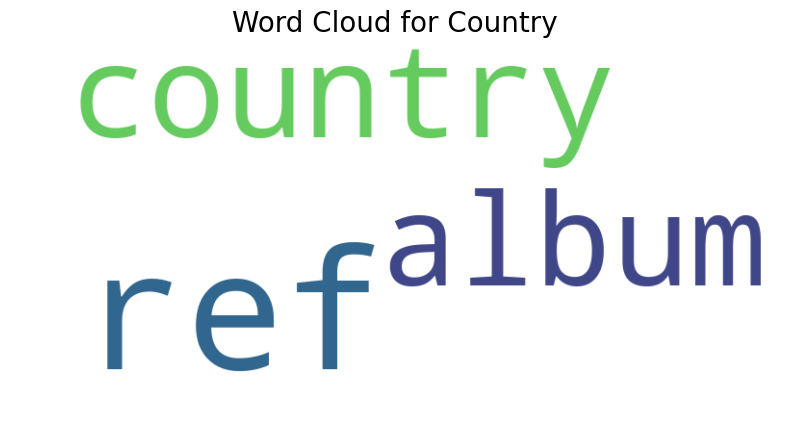

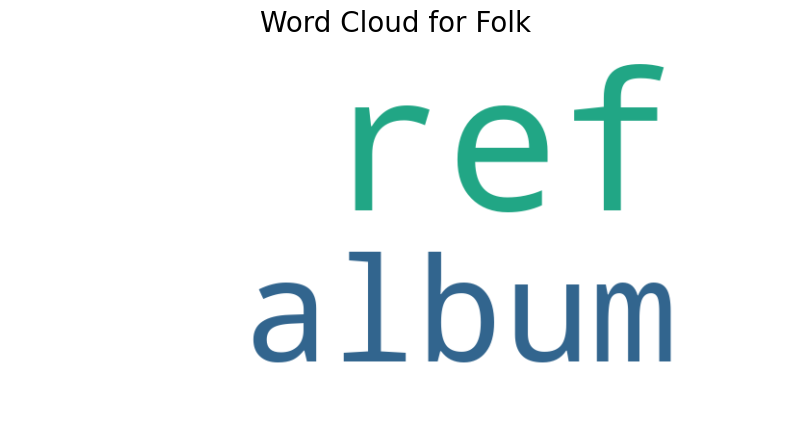

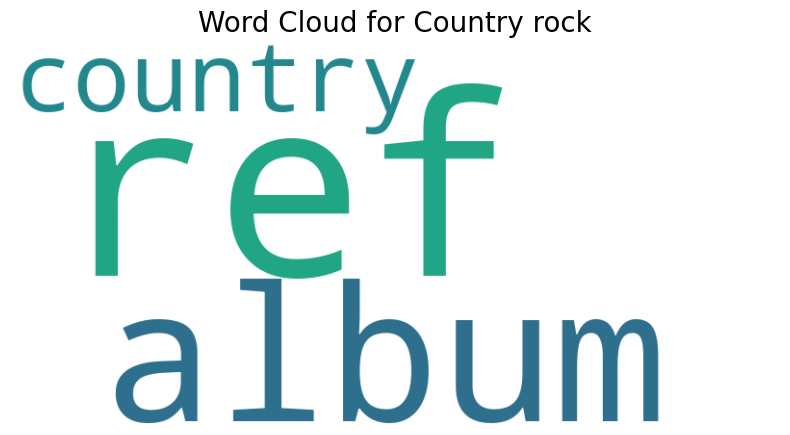

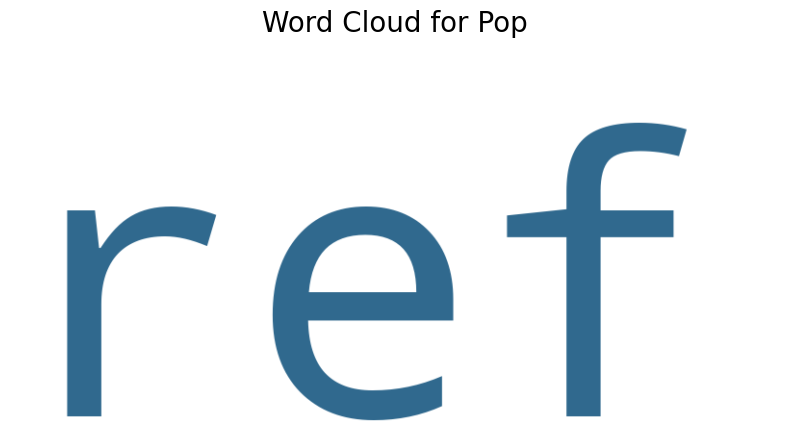

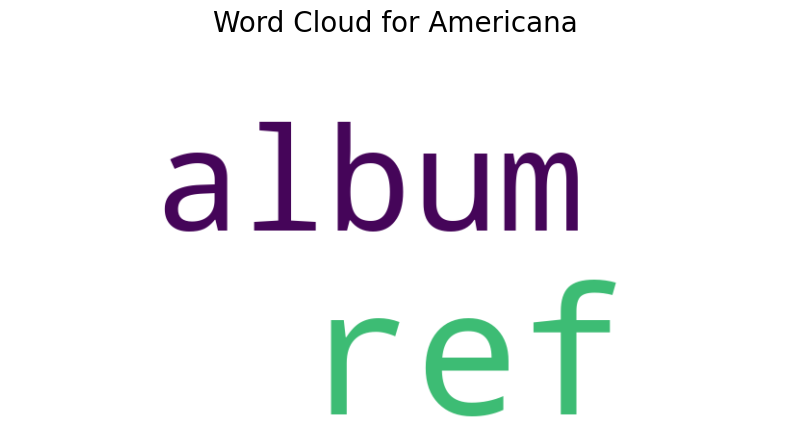

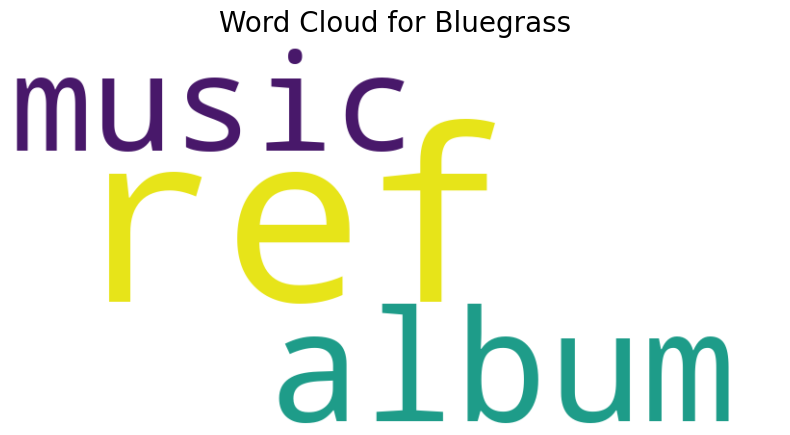

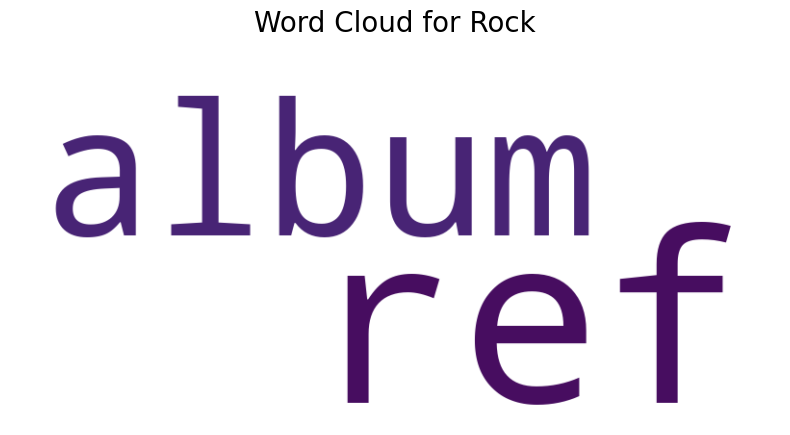

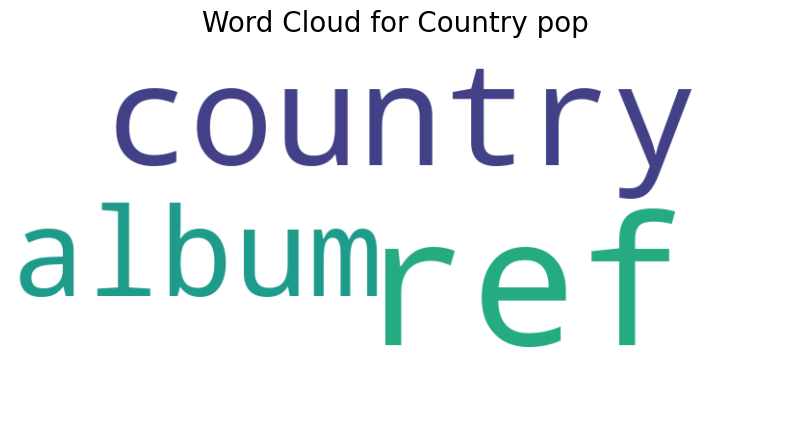

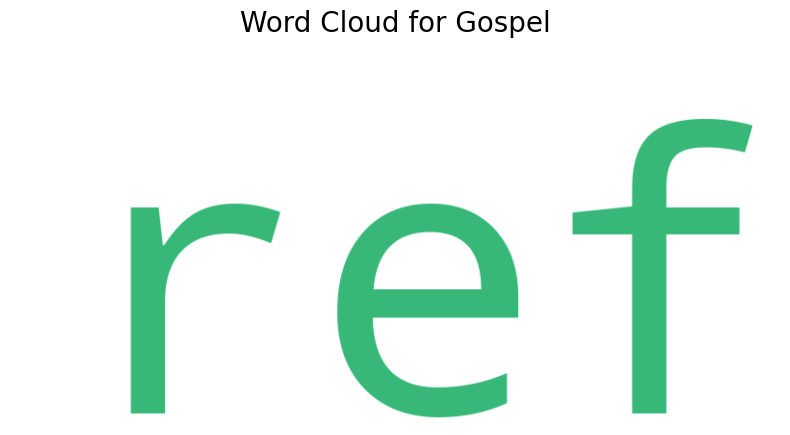

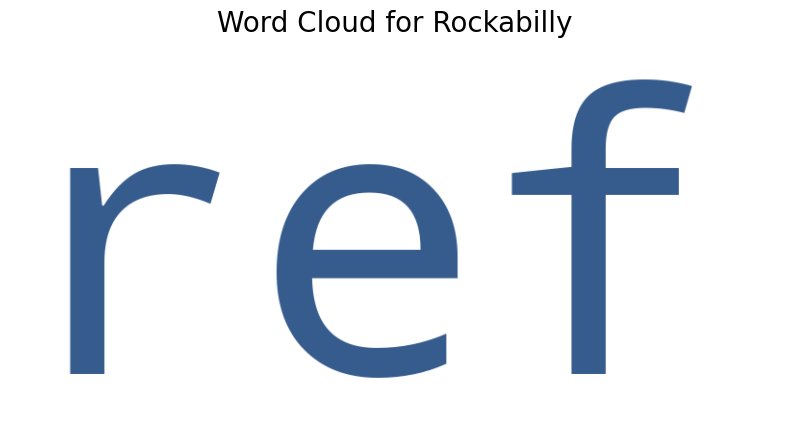

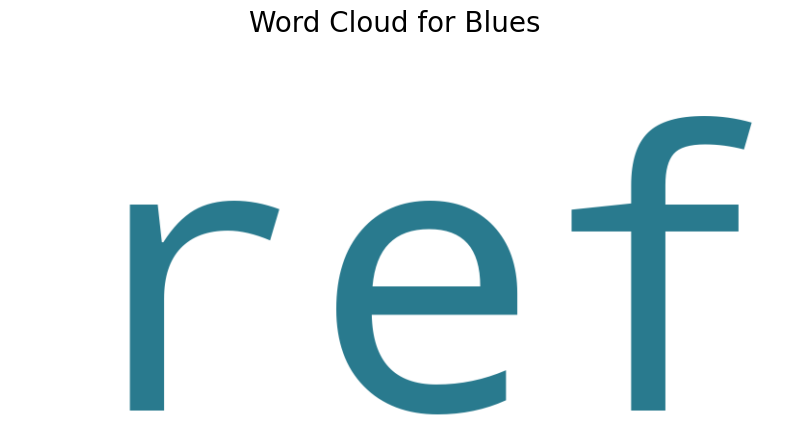

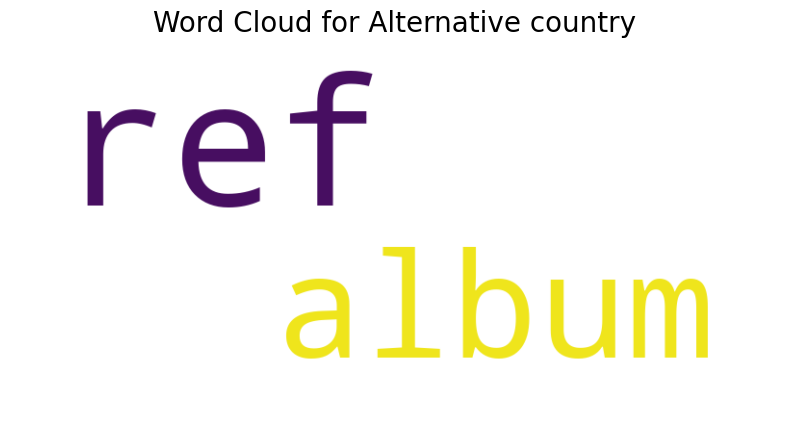

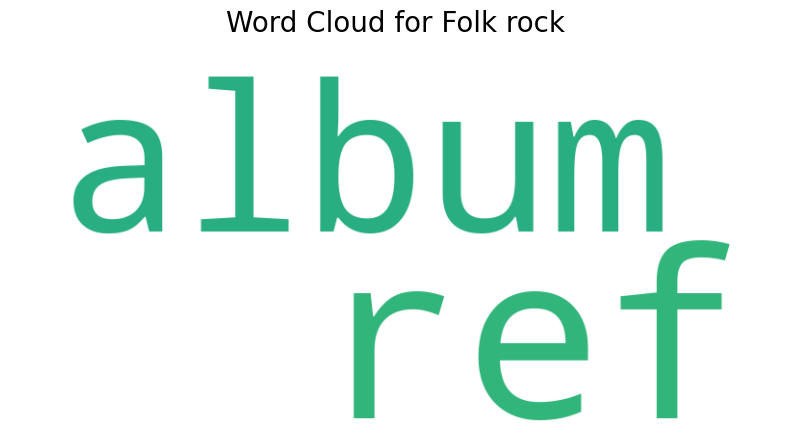

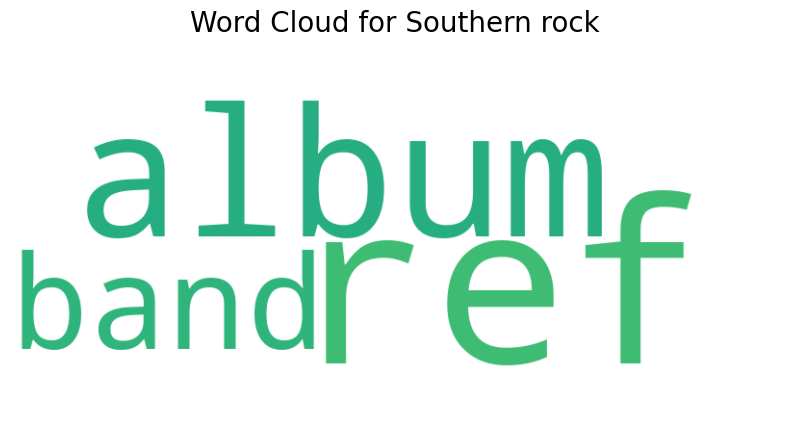

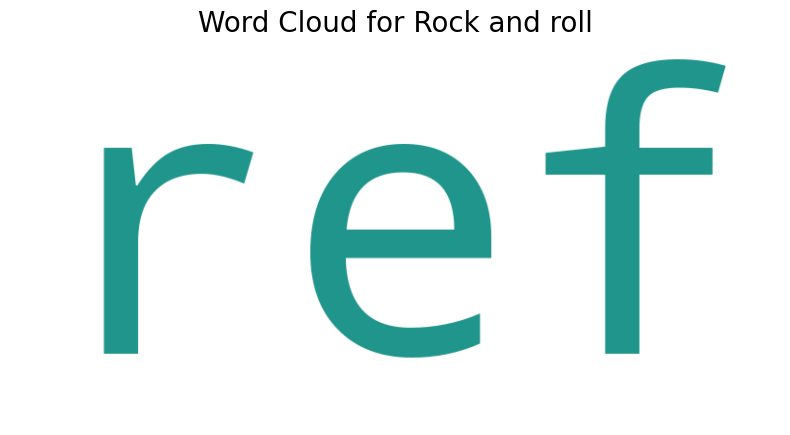

In [124]:
# Create a word cloud for each genre
for genre, word_list in tf_lists.items():
    # Create a string where each word appears count times
    text = ' '.join([word for word, count in word_list for _ in range(int(np.ceil(count)))])
    
    # Generate the word cloud with a higher max_words limit
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          collocations=False, max_words=100).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title(f'Word Cloud for {genre.capitalize()}', fontsize=20)
    plt.show()

# Part 5: Understanding TF-IDF

Now we jump back into the NLP work. In this last part, we'll be creating word-clouds again. But this time, we'll be using the method from the paper I discuss above: TF-IDF. Historically people have had a hard time grasping the idea behind TF-IDF, so here's a little exercise designed to make you study it a bit more carefully.

*Exercise 4*: Wrap your brain around TF-IDF

First, let's learn about TF-IDF the way wikipedia explains it. Check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and ***read the first part very carefully***. The idea is that the term frequency doesn't capture just what's special about a text. It also captures words that are just frequent in all text. 

This is clear from the top counts in one of my lists:

```
of 
in 
and 
the 
to 
a 
is
by
was
as
ref
with
first
 ```
 
You can fix some of this by removing stop-words (as is described in the book), but it's not enough. ***We want to pull out what's special about a particular text.*** 

To focus on just what's special, TF-IDF has two components: The *term frequency* (TF) and a *weight* (IDF). The weight draws on a larger corpus of text emphasize what's special about the text we're interested in.

Further, there are some extra things going on. For example, there are multiple definitions of TF. Above, we just looked at the raw counts.

> *Action items*
>   * Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count.
>   * What does IDF stand for? Answer in your own words.
>   * How does IDF draw on a larger corpus to extract what's special a certain text? Answer in your own words.

There are also multiple versions of IDF. Let's think about those for a moment.

> *Action items*
>   * All of the IDF versions take the log of the calculated weight. Why do you think that is?
>   * Explain why using IDF makes stopword removal less important.

<div class="alert alert-block alert-info">
The point of this exercise is to understand TF-IDF. So I encourage you to ask questions to an LLM to really understand the concept. Perhaps ask it to explain TF-IDF at the level of a high-school student. Once you've done that, then answer the questions in the action items on your own.
</div>

# Part 6: Genres and TF-IDF word-clouds

**But wait a minute!** Now we have all of the ingredients for a wonderful cocktail 😎

* We have genres - descriptions of related nodes in the network. 
* And you're an expert on TF-IDF, so you can extract words that characterize a text relative to everything that's going on.
* Finally, you can create nice WordCouds!

So let's put it all together. Let's use TF-IDF and wordcoulds to build a deeper understanding of the top communities.

Thus, the aim of this final part is to create genre wordclouds for the top 15 genres based on TF-IDF. 

For each genre, create a single document for each community consisting of all the cleaned text from all members of the community. So in the end, you should have 15 documents in total.

_Exercise_: Genre Word-clouds

> * Now that we have the community-texts, let's start by grabbing the TF lists from the exercise above (you may modify to use whichever version of TF you like). 
> * Next, calculate IDF for every word in every list (use whichever version of IDF you like). 
>   * Which base logarithm did you use? Is that important?
> * We're now ready to calculate TF-IDFs. Do that for each genre. 
>   * List the 10 top words for each genre accourding to TF-IDF. Are these 10 words more descriptive of the genre than just the TF? Justify your answer.
> * Create a wordcloud for each genre. 
> * Explain your creation. Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.

<div class="alert alert-block alert-info">
Overall, it's OK to use an LLM to help with the code. But do write your own answers to the questions.
</div>

*Exercise*: Community Word-clouds (optional)
> * Redo the exercise above but for the structural communities.
> * Do the word clouds seem more meaningful than for the genres? Add nuance to your answer by considering the confusion matrix $D$ that you calculated above.

<div class="alert alert-block alert-info">
Since this is optional, you can do wat you want with LLMs. Maybe you can get one to solve the whole exercise?
</div>